<a href="https://colab.research.google.com/github/Niharika2098/Projects-Data-Science/blob/main/chatbot_log_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Chatbot Log Analyzer...
Simulated log generated.
--- Chatbot Conversation Log Analysis ---

Total conversations: 1000
Unique users: 944
Data period: From 2025-05-21 14:11 to 2025-06-20 13:05

--- Simulated Intent Distribution ---
simulated_intent
account_help        121
thank_you           110
unsure_query        104
order_status        101
human_escalation    100
product_inquiry      98
no_match             95
billing_question     93
general_greeting     90
tech_support         88
Name: count, dtype: int64

Most common intent: 'account_help' (121 times)

--- Resolution Status Distribution ---
resolution_status
Resolved      738
Unresolved    262
Name: count, dtype: int64
Conversations resolved by bot: 73.80%

--- Top 5 Simulated Intents Leading to Unresolved Conversations ---
simulated_intent
human_escalation    100
no_match             95
unsure_query         67
Name: count, dtype: int64

--- Daily Conversation Volume (First 5 Days) ---
date
2025-05-21    19
2025-05-22    46

/tmp/ipython-input-1-3983693836.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="viridis")


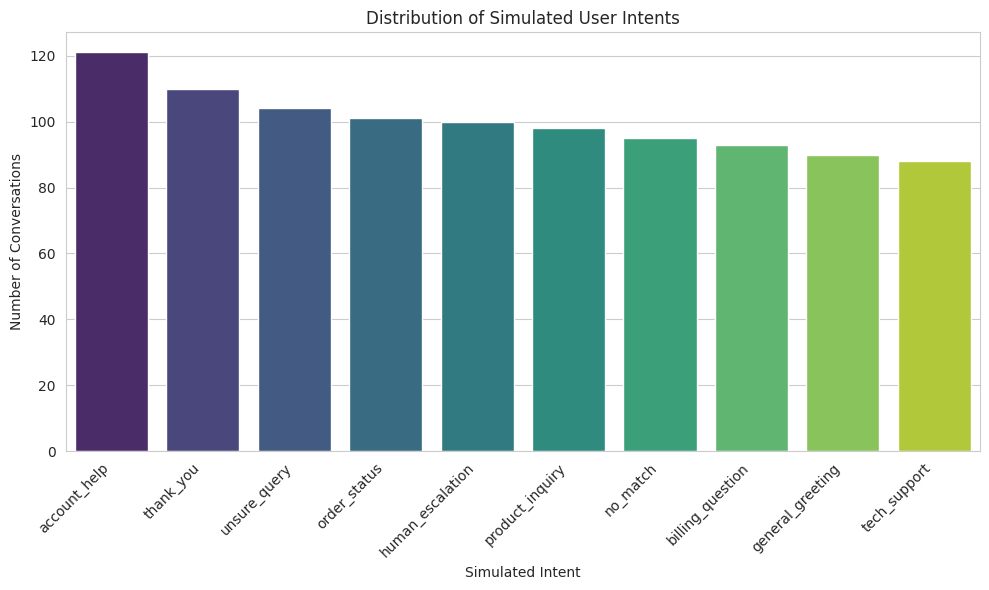

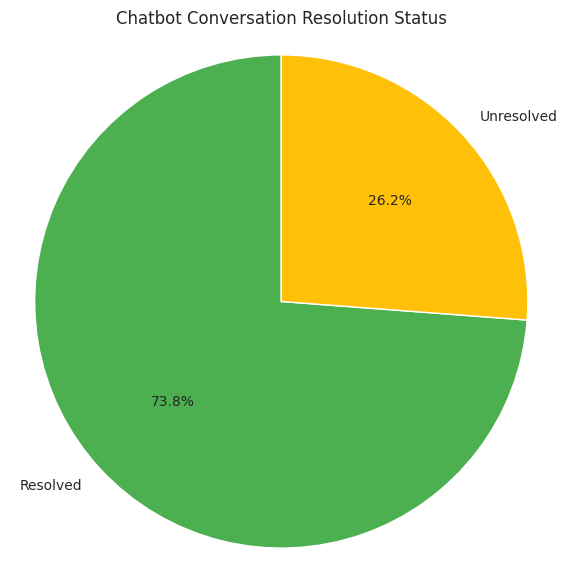

/tmp/ipython-input-1-3983693836.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unresolved_intent_counts.index, y=unresolved_intent_counts.values, palette="plasma")


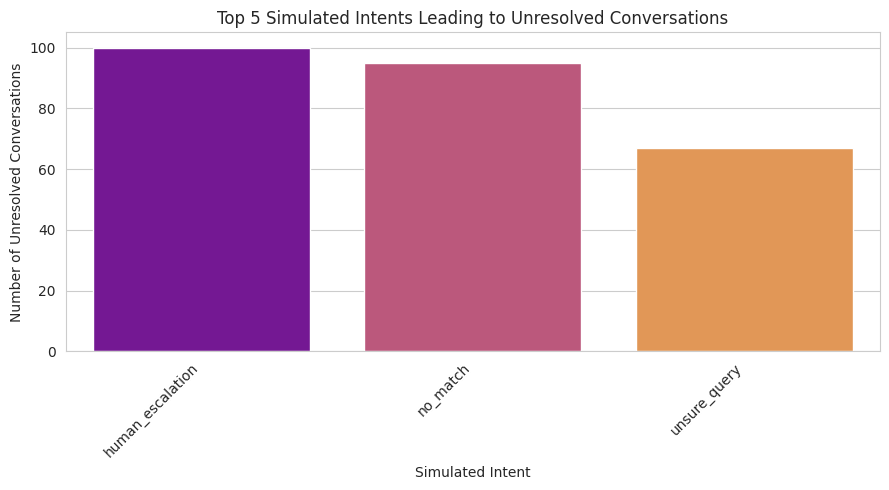

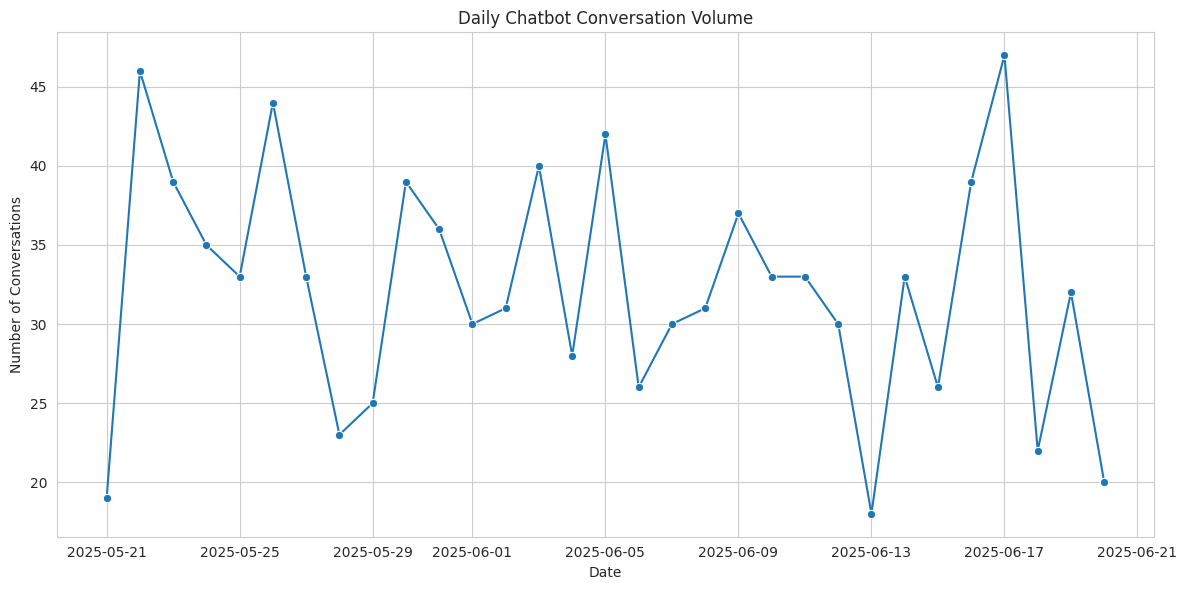


Analysis complete. Check the generated plots.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Simulate Chatbot Conversation Data ---
def generate_simulated_log(num_entries=500):
    """ Generates a simulated log of chatbot interactions."""
    conversation_data = []
    start_time = datetime.now() - timedelta(days=30) # Last 30 days of data

    intents = {
        "product_inquiry": ["What products do you offer?", "Tell me about your services", "Do you have X?", "Product information please"],
        "order_status": ["Where is my order?", "Track my package", "Order status for order ID", "Has my item shipped?"],
        "tech_support": ["I have a technical issue", "My device is not working", "Need help with setup", "Troubleshooting help"],
        "account_help": ["Can't log in", "Reset my password", "Update account info", "Change my email"],
        "billing_question": ["Billing inquiry", "My bill is wrong", "How do I pay?", "Subscription cost"],
        "general_greeting": ["Hello", "Hi there", "Good morning"],
        "thank_you": ["Thanks", "Thank you", "Appreciate the help"],
        "unsure_query": ["I don't understand", "What does that mean?", "Can you explain?"], # Bot failed to understand or user confused
        "human_escalation": ["I need to speak to a human", "Connect me to support", "Can I talk to an agent?"], # Explicit request for human
        "no_match": ["gibberish", "asdfasdf", "I hate this bot", "random words that don't make sense"] # Explicitly unhandled
    }

    # Simulate bot responses based on intent (simplified)
    bot_responses = {
        "product_inquiry": ["We offer a range of products including laptops, monitors, and accessories.", "Which product are you interested in?"],
        "order_status": ["Please provide your order ID to check the status.", "Could you give me your order number?"],
        "tech_support": ["What kind of device are you having issues with?", "Can you describe your problem in more detail?"],
        "account_help": ["I can help with password resets. What's your email?", "To update your account, please visit our website."],
        "billing_question": ["What specifically about your bill are you asking about?", "You can view your invoices in your account portal."],
        "general_greeting": ["Hello! How can I assist you today?", "Hi there!"],
        "thank_you": ["You're welcome!", "Glad I could help."],
        "unsure_query": ["I'm sorry, I didn't understand that. Can you rephrase?", "Could you provide more details?"],
        "human_escalation": ["Connecting you to a human agent now. Please wait.", "I'm escalating your query to our support team."],
        "no_match": ["I'm not sure how to respond to that.", "Could you please try asking something else?"]
    }

    for i in range(num_entries):
        user_id = f"user_{random.randint(1000, 9999)}"
        timestamp = start_time + timedelta(minutes=random.randint(0, 30*24*60))

        # Randomly pick an intent and a user query for it
        intent_category = random.choice(list(intents.keys()))
        user_query = random.choice(intents[intent_category])

        # Simulate bot response
        bot_response = random.choice(bot_responses[intent_category])

        # Simulate resolution status
        # Assume 'human_escalation' and 'no_match' are 'Unresolved'
        # Assume 'unsure_query' is sometimes 'Unresolved'
        resolution_status = "Resolved"
        if intent_category in ["human_escalation", "no_match"] or \
           (intent_category == "unsure_query" and random.random() < 0.7): # 70% of unsure queries are unresolved
            resolution_status = "Unresolved"

        conversation_data.append({
            "timestamp": timestamp,
            "user_id": user_id,
            "user_query": user_query,
            "simulated_intent": intent_category, # This is what we 'know' the user wanted
            "bot_response": bot_response,
            "resolution_status": resolution_status
        })

    df = pd.DataFrame(conversation_data)
    df = df.sort_values(by="timestamp").reset_index(drop=True)
    return df

# --- 2. Perform Data Analysis ---
def analyze_chatbot_log(df):
    """Performs analysis on the simulated chatbot conversation log."""
    print("--- Chatbot Conversation Log Analysis ---")
    print(f"\nTotal conversations: {len(df)}")
    print(f"Unique users: {df['user_id'].nunique()}")

    # Time range of data
    start_date = df['timestamp'].min().strftime('%Y-%m-%d %H:%M')
    end_date = df['timestamp'].max().strftime('%Y-%m-%d %H:%M')
    print(f"Data period: From {start_date} to {end_date}")

    # --- Intent Distribution ---
    print("\n--- Simulated Intent Distribution ---")
    intent_counts = df['simulated_intent'].value_counts()
    print(intent_counts)
    print(f"\nMost common intent: '{intent_counts.index[0]}' ({intent_counts.iloc[0]} times)")

    # --- Resolution Status ---
    print("\n--- Resolution Status Distribution ---")
    resolution_counts = df['resolution_status'].value_counts()
    print(resolution_counts)
    resolved_percentage = (resolution_counts.get("Resolved", 0) / len(df)) * 100
    print(f"Conversations resolved by bot: {resolved_percentage:.2f}%")

    # --- Top Unresolved Intents ---
    print("\n--- Top 5 Simulated Intents Leading to Unresolved Conversations ---")
    unresolved_df = df[df['resolution_status'] == 'Unresolved']
    if not unresolved_df.empty:
        unresolved_intent_counts = unresolved_df['simulated_intent'].value_counts().head(5)
        print(unresolved_intent_counts)
    else:
        print("All conversations were resolved or no unresolved data.")

    # --- User Activity Over Time (Daily) ---
    df['date'] = df['timestamp'].dt.date
    daily_conversations = df['date'].value_counts().sort_index()
    print("\n--- Daily Conversation Volume (First 5 Days) ---")
    print(daily_conversations.head())
    print("...")
    print(daily_conversations.tail())

    return intent_counts, resolution_counts, unresolved_intent_counts, daily_conversations

# --- 3. Visualize Insights ---
def visualize_analysis(intent_counts, resolution_counts, unresolved_intent_counts, daily_conversations):
    """Generates visualizations for the chatbot analysis."""
    print("\n--- Generating Visualizations ---")
    sns.set_style("whitegrid")

    # Plot 1: Simulated Intent Distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="viridis")
    plt.title('Distribution of Simulated User Intents')
    plt.xlabel('Simulated Intent')
    plt.ylabel('Number of Conversations')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot 2: Resolution Status
    plt.figure(figsize=(7, 7))
    plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
    plt.title('Chatbot Conversation Resolution Status')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Plot 3: Top Unresolved Intents (if available)
    if not unresolved_intent_counts.empty:
        plt.figure(figsize=(9, 5))
        sns.barplot(x=unresolved_intent_counts.index, y=unresolved_intent_counts.values, palette="plasma")
        plt.title('Top 5 Simulated Intents Leading to Unresolved Conversations')
        plt.xlabel('Simulated Intent')
        plt.ylabel('Number of Unresolved Conversations')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Plot 4: Daily Conversation Volume
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=daily_conversations.index, y=daily_conversations.values, marker='o')
    plt.title('Daily Chatbot Conversation Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Conversations')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Main Execution ---
if __name__ == "__main__":
    print("Starting Chatbot Log Analyzer...")

    # Generate data
    df_log = generate_simulated_log(num_entries=1000)
    print("Simulated log generated.")

    # Analyze data
    intent_counts, resolution_counts, unresolved_intent_counts, daily_conversations = analyze_chatbot_log(df_log)

    # Visualize data
    visualize_analysis(intent_counts, resolution_counts, unresolved_intent_counts, daily_conversations)

    print("\nAnalysis complete. Check the generated plots.")

